In [ ]:
import os
from os import path
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.utils import to_categorical


IMG_ROWS = 112
IMG_COLS = 112
num_classes = 2
batch_size = 32
# Grayscale Images 1
# Colored Images 3
channel_type = 1 
activation_type = "relu"


In [ ]:


layers = [
          Conv2D(64, (3,3), input_shape=(IMG_ROWS, IMG_COLS, channel_type)),
          Activation(activation_type),
          MaxPooling2D(pool_size=(2,2)),
          Conv2D(128, (3,3)),
          Activation(activation_type),
          MaxPooling2D(pool_size=(2,2)),
          Flatten(),
          Dropout(0.5),
          Dense(64, activation=activation_type),
          Dense(num_classes, activation='softmax')
]
model = Sequential(layers)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(lr=0.001),
    metrics = ['accuracy']
)

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 110, 110, 64)      640       
_________________________________________________________________
activation_6 (Activation)    (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_7 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 86528)            

In [ ]:
# Load the Dataset
os.chdir('/content/drive/My Drive/Datasets')
dataset = 'FaceMaskDataset'
images = []
labels = []

data_categories = os.listdir(dataset)

for ctg in data_categories:
  print(f'\n[READING] {ctg}')
  active_ctg = path.join(dataset, ctg)

  for img in os.listdir(active_ctg):
    print('\r',f'[CURRENT] {img}', end=' ')
    img = cv2.imread(path.join(active_ctg, img))
    try:
      img_greyscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      images.append(
          cv2.resize(img_greyscaled, (IMG_ROWS, IMG_COLS))
      )
      labels.append(ctg)
    except Exception as e:
      print(e)

print("[DONE] Images read successfully")
    
images = np.array(images)/255.0
images = np.reshape(images, (
    images.shape[0], IMG_ROWS, IMG_COLS, 1
)) 
# Hot encode labels because they are in textual form
lb_binarizer = LabelBinarizer()
labels = lb_binarizer.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_x, test_x, train_y, test_y) = train_test_split(
    images, labels, test_size=0.25, random_state=0
)


[READING] WithoutMask
 [CURRENT] 0_0_masu_0081.jpg 
[READING] WithMask
 [CURRENT] 0_1_8 copy.jpg [DONE] Images read successfully


In [ ]:
fitted_fmd_model = model.fit(
    train_x,
    train_y,
    epochs = 50,
    validation_split = 0.25
)

Epoch 1/50
68/68 [==============================] - 90s 1s/step - loss: 0.8939 - accuracy: 0.5940 - val_loss: 0.5433 - val_accuracy: 0.7524
Epoch 2/50
68/68 [==============================] - 84s 1s/step - loss: 0.4426 - accuracy: 0.7930 - val_loss: 0.4554 - val_accuracy: 0.8011
Epoch 3/50
68/68 [==============================] - 84s 1s/step - loss: 0.3415 - accuracy: 0.8456 - val_loss: 0.4460 - val_accuracy: 0.8164
Epoch 4/50
68/68 [==============================] - 84s 1s/step - loss: 0.2822 - accuracy: 0.8758 - val_loss: 0.3199 - val_accuracy: 0.8748
Epoch 5/50
68/68 [==============================] - 84s 1s/step - loss: 0.2056 - accuracy: 0.9173 - val_loss: 0.3295 - val_accuracy: 0.8679
Epoch 6/50
68/68 [==============================] - 84s 1s/step - loss: 0.1568 - accuracy: 0.9379 - val_loss: 0.3365 - val_accuracy: 0.8748
Epoch 7/50
68/68 [==============================] - 84s 1s/step - loss: 0.1385 - accuracy: 0.9346 - val_loss: 0.3185 - val_accuracy: 0.8818
Epoch 8/50
68/68 [==

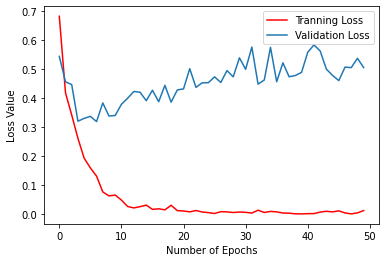

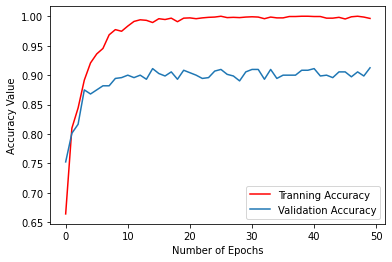

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting 
from matplotlib import pyplot as plt

# Tranning and Validation Loss
plt.plot(fitted_fmd_model.history['loss'],'r',label='Tranning Loss')
plt.plot(fitted_fmd_model.history['val_loss'],label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()
plt.savefig("TranningValidationLoss.png")


# Tranning and Validation Accuracy
plt.plot(fitted_fmd_model.history['accuracy'],'r',label='Tranning Accuracy')
plt.plot(fitted_fmd_model.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()
plt.savefig("TranningValidationAccuracy.png")

In [ ]:
model.save('FMDM.h5')

In [ ]:
Testing The Model [GOOGLE COLAB]

In [ ]:
# Install opencv [FOR GOOGLE COLAB]
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [ ]:
# To Take input from webcam on Google Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

m = load_model('FMDM.h5')
c = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

video = cv2.VideoCapture(0)
results = {
    0 : 'Wearing Mask',
    1 : 'No Mask' 
}

colors = {
    0 : (0,255,0),
    1 : (0,0,255)
}

while True:
  # ret, img = video.read()
  img = cv2.imread(take_photo(), cv2.IMREAD_UNCHANGED)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = c.detectMultiScale(img_gray, 1.3, 5)

  for (x,y,w,h) in faces:
    img_face = img_gray[y:y+w, x:x+w]
    img_norm = cv2.resize(img_face, (112,112)) / 255.0
    img_rshp = np.reshape(img_norm, (1,112,112,1))

    r = m.predict(img_rshp)
    l = np.argmax(r, axis=1)[0]

    print(l)

    cv2.rectangle(img, (x, y), (x + w, y + h), colors[l],2)
    cv2.rectangle(img, (x, y - 40), (x + w, y),colors[l], -1)
    cv2.putText(img, results[l], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
  
  # cv2.imshow() causes jupyter session problems on Colab, so using Google Patch
  cv2_imshow(img)
  k = cv2.waitKey(1)
  if k == 27:
    break


